# Student Performance Indicator

### Life Cycle of Machine Learning Project

**Understanding the Problem Statement



**Data Collection


**Data Checks to perform


** Exploratory data analysis


** Data Pre-Processing


** Model Training



** Choose best model

## 1)Problem statement


** This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2)Data Collection

** Dataset Source- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
** The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [1257]:
df = pd.read_csv('c:/Users/SAMIMA AFROJ/Downloads/Stud.csv')

## Show Top 5 Records

In [1258]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [1259]:
df.shape

(1000, 8)

## 2.2 Dataset information

** gender : sex of students -> (Male/female)
** race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
** parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,** associate's degree,high school)
** lunch : having lunch before test (standard or free/reduced)
** test preparation course : complete or not complete before test
** math score
** reading score
** writing score

## 3)Data Checks to perform

** Check Missing values
** Check Duplicates
** Check data type
** Check the number of unique values of each column
** Check statistics of data set
** Check various categories present in the different categorical column

## 3.1 Check Missing values

In [1260]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2 Check Duplicates

In [1261]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

### 3.3 Check data types

In [1262]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [1263]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [1264]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.7 Exploring Data

In [1265]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [1266]:
# Step 1: Check original column names
print("Original column names:")
print(df.columns.tolist())

# Step 2: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Step 3: Print unique values from categorical columns
print("\nCategories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Original column names:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [1267]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [1268]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [1269]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [1270]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [1271]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

Histogram ,
Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

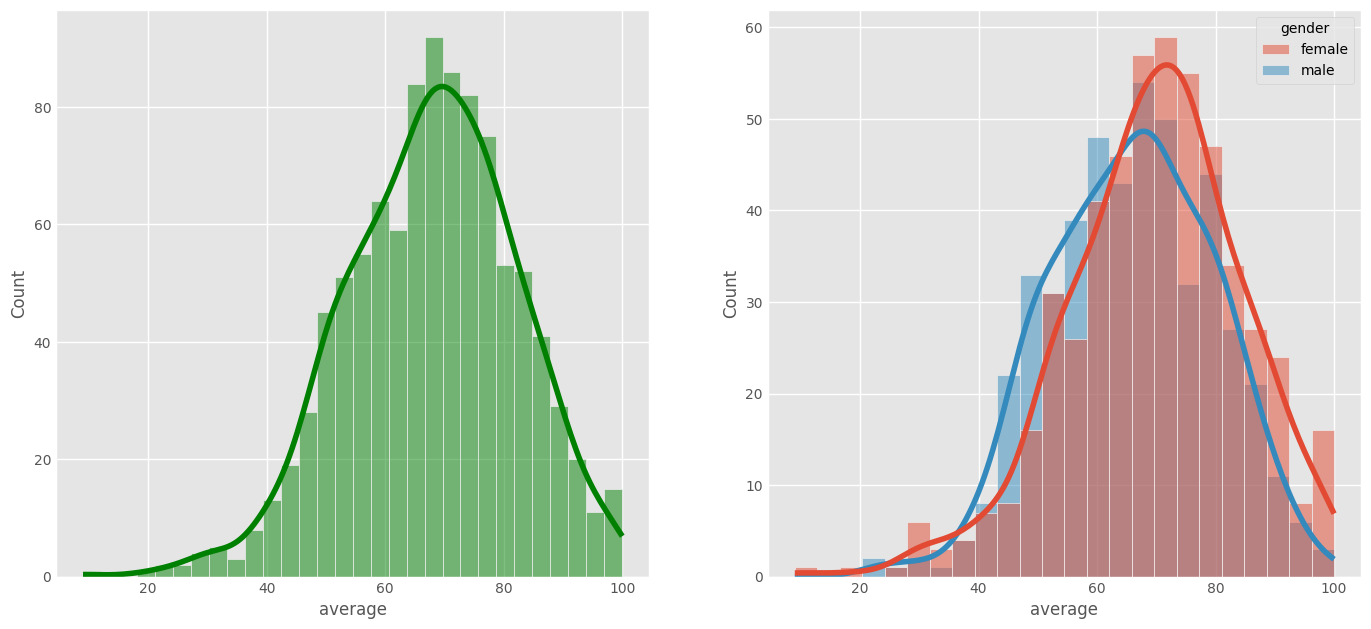

In [1272]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

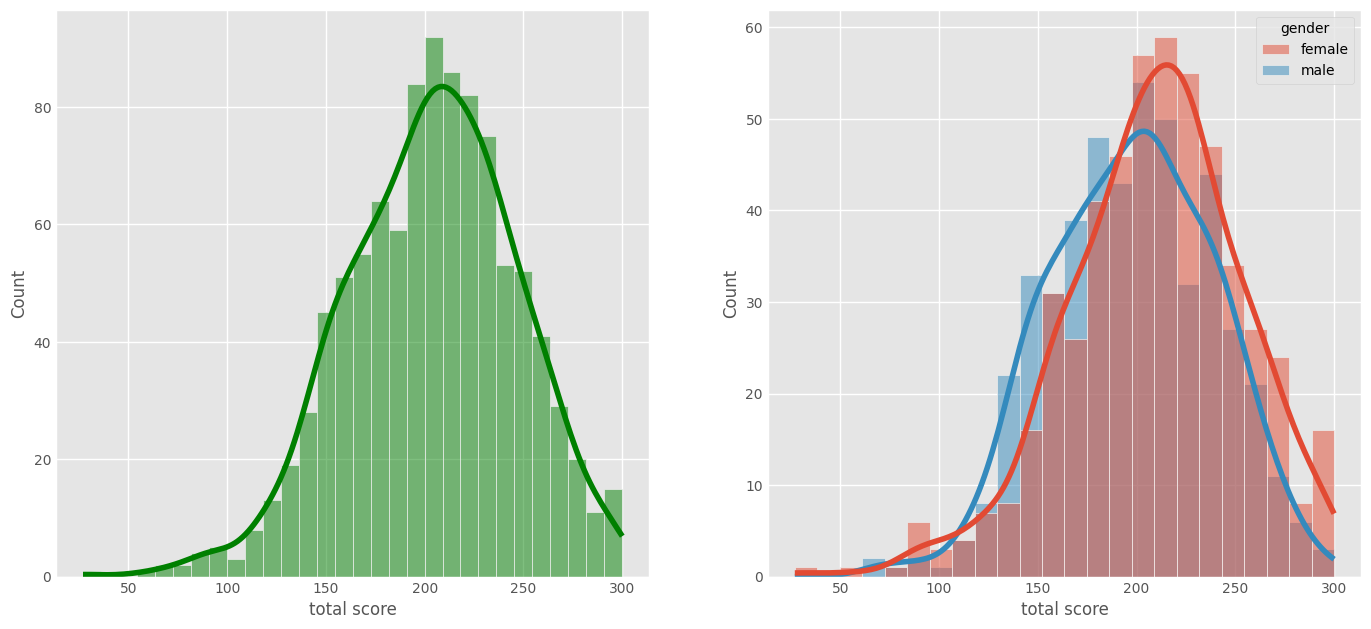

In [1273]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

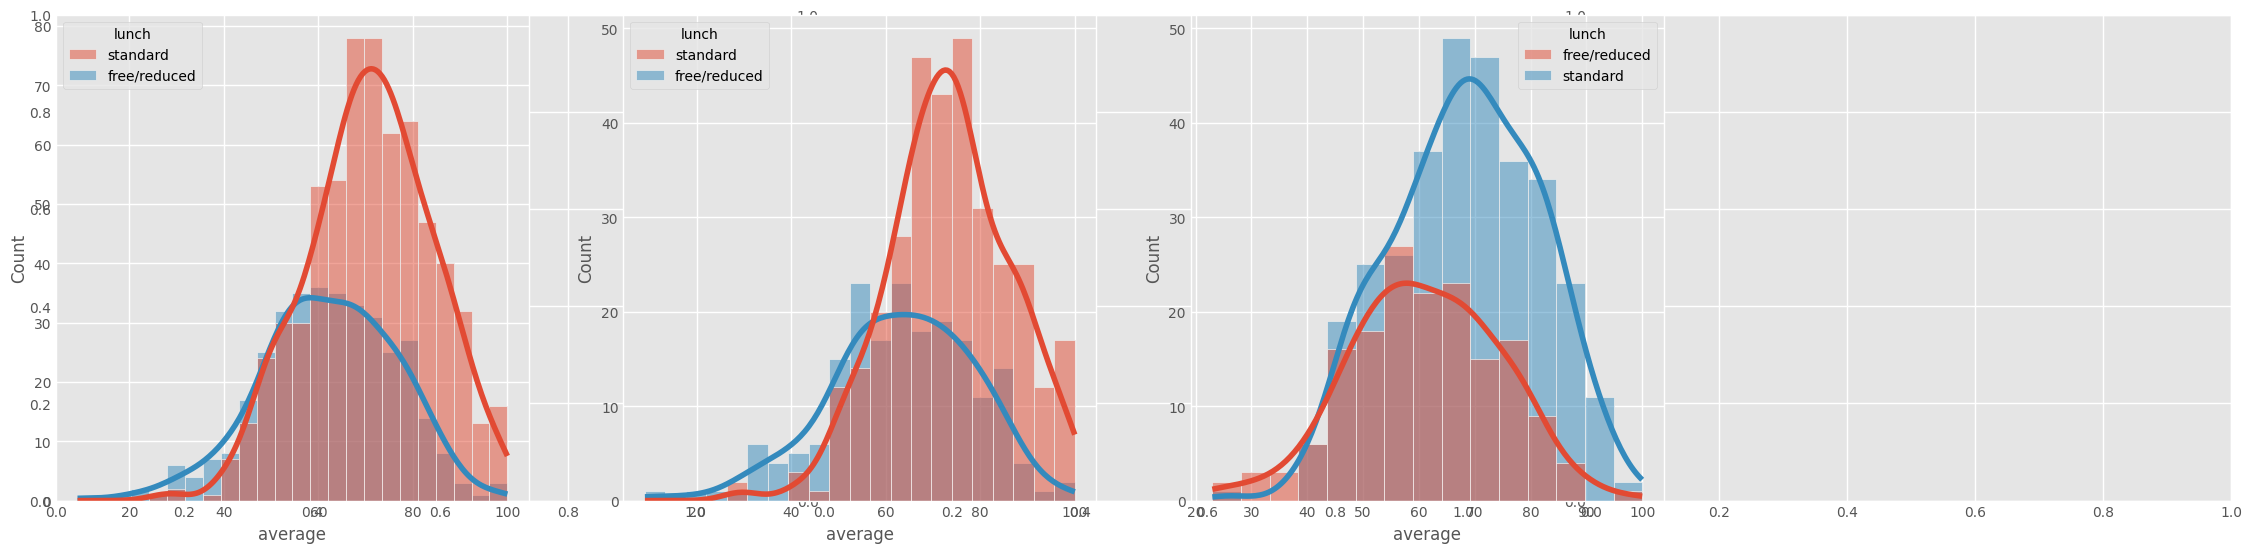

In [1274]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

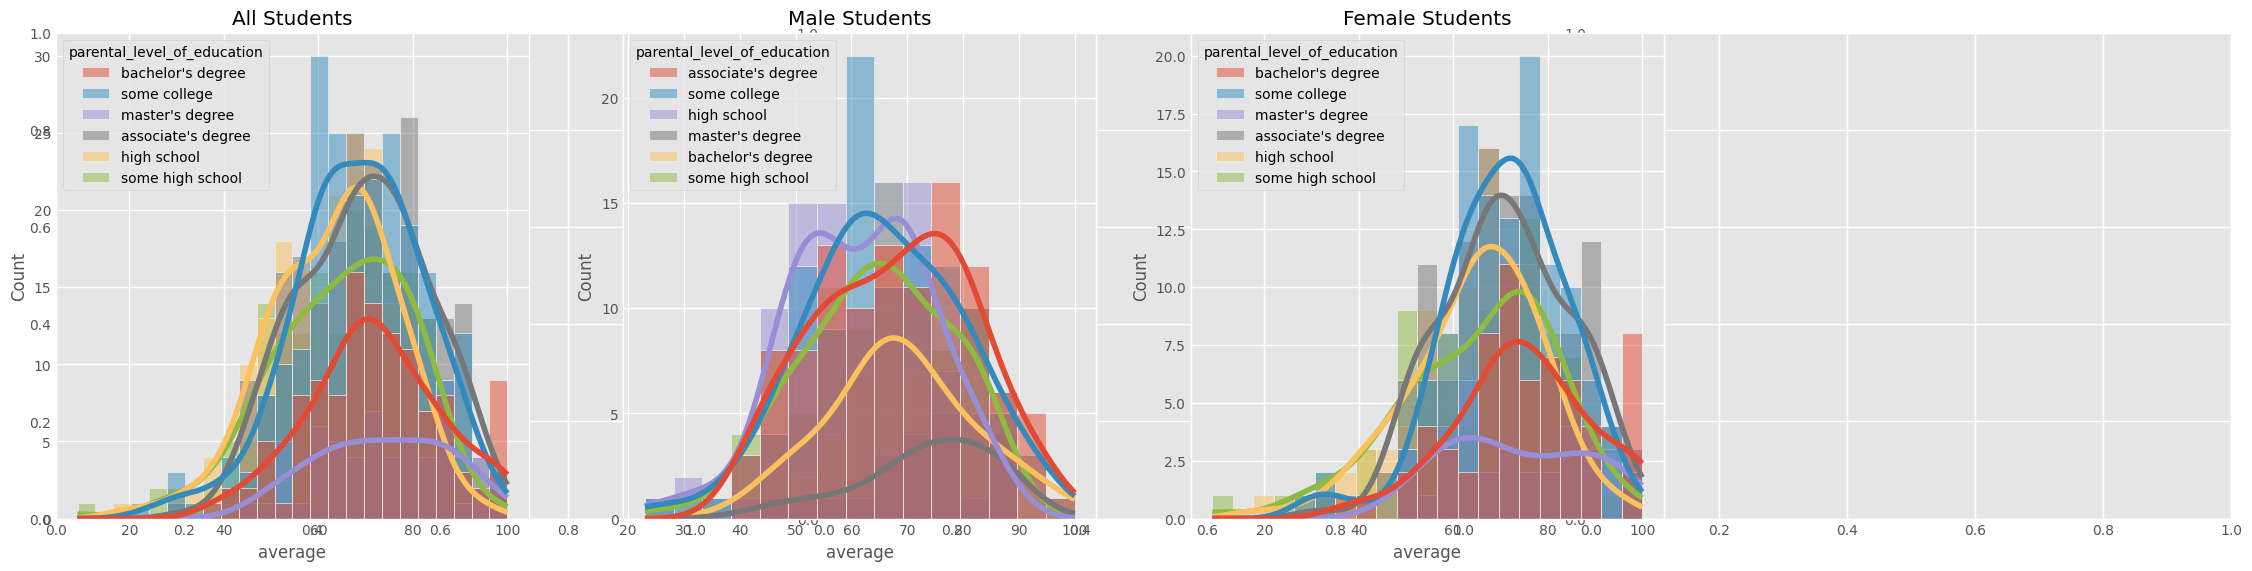

In [1275]:
plt.subplots(1, 3, figsize=(25, 6))

# First subplot - all students
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
ax.set_title("All Students")

# Second subplot - male students only
plt.subplot(142)
ax = sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education')
ax.set_title("Male Students")

# Third subplot - female students only
plt.subplot(143)
ax = sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education')
ax.set_title("Female Students")

# Show the plots
plt.tight_layout()
plt.show()

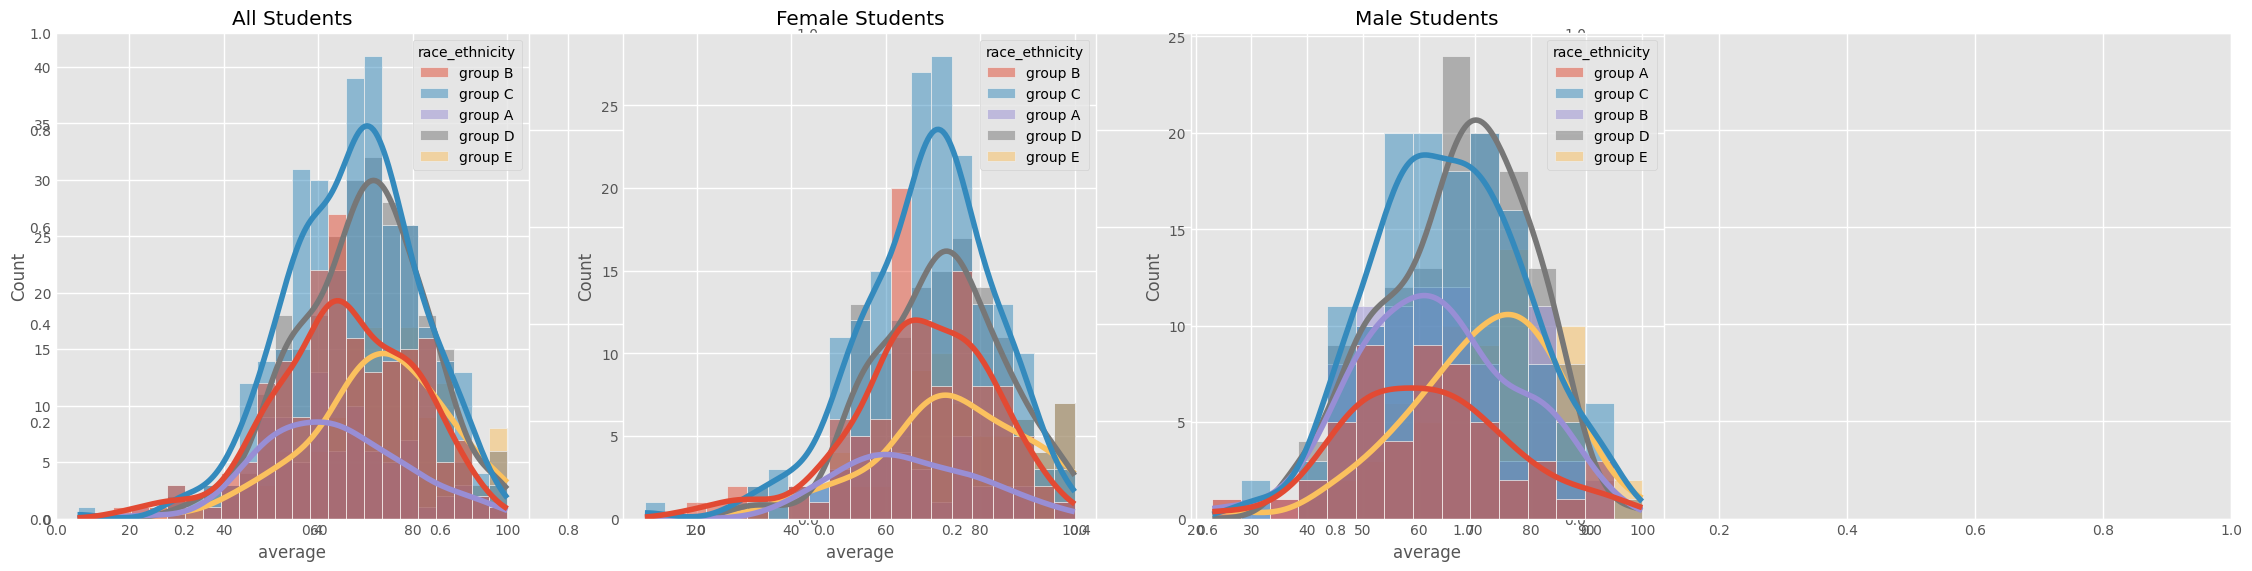

In [1276]:
plt.subplots(1, 3, figsize=(25, 6))

# First subplot - all students
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
ax.set_title("All Students")

# Second subplot - female students only
plt.subplot(142)
ax = sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity')
ax.set_title("Female Students")

# Third subplot - male students only
plt.subplot(143)
ax = sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity')
ax.set_title("Male Students")

# Show the plots
plt.tight_layout()
plt.show()

### 4.2 Maximumum score of students in all three subjects

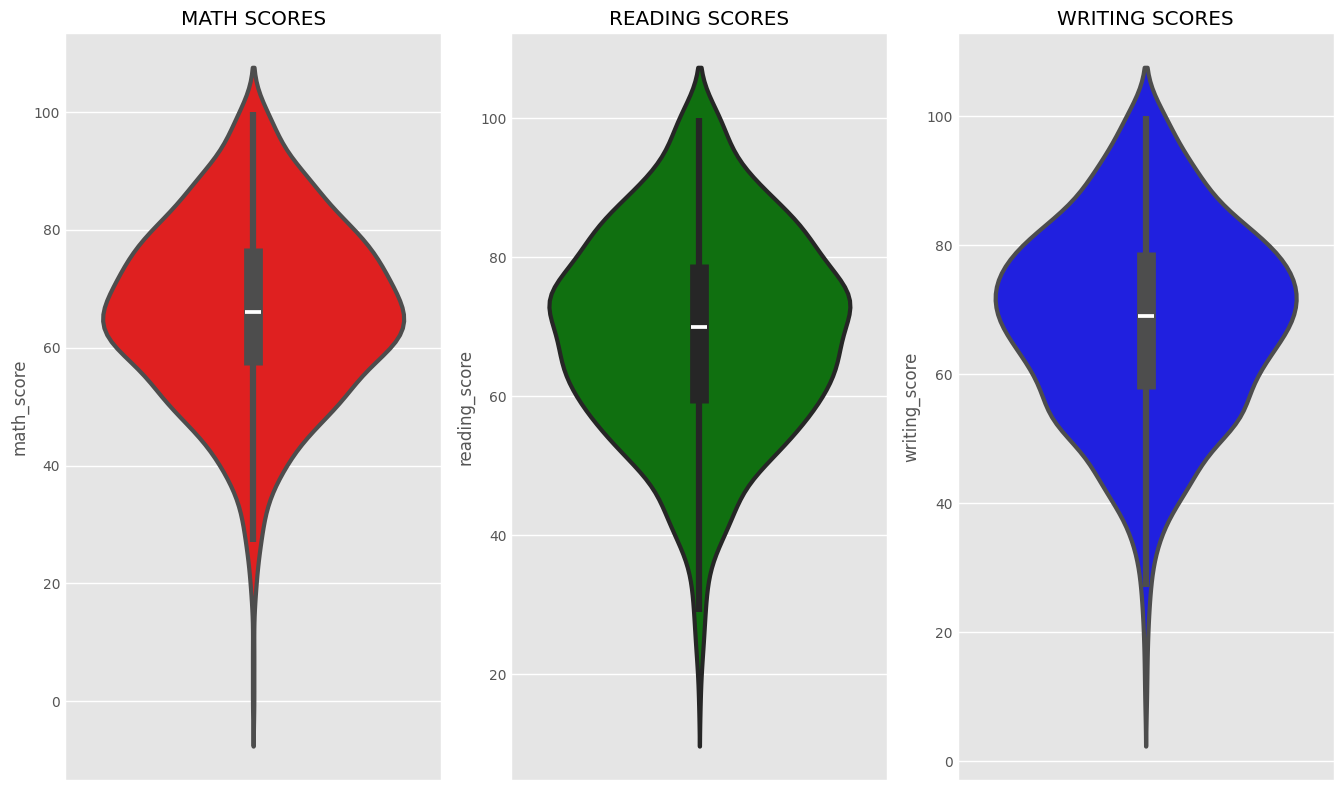

In [1277]:
plt.figure(figsize=(18,8))

# Violin plot for Math Scores
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Violin plot for Reading Scores
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Violin plot for Writing Scores
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

# Display the plots
plt.tight_layout()
plt.show()

### 4.3 Multivariate analysis using pieplot

Cleaned Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total score', 'average']


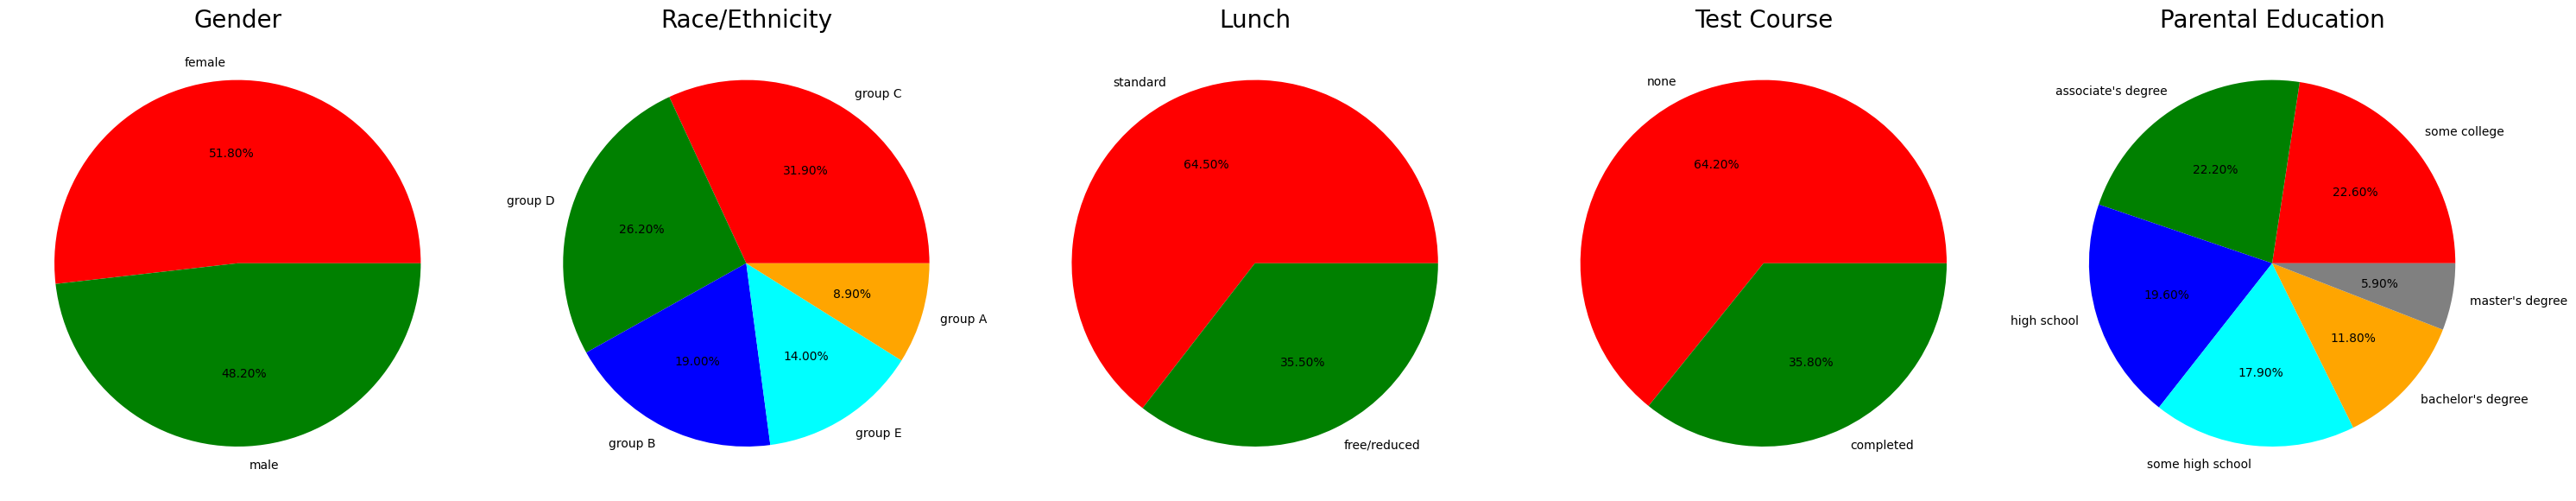

In [1278]:
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Confirm column names (optional)
print("Cleaned Columns:", df.columns.tolist())

plt.rcParams['figure.figsize'] = (30, 12)

# Pie 1: Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Pie 2: Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Pie 3: Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Pie 4: Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Pie 5: Parental Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

### 4.4 Feature Wise Visualization

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

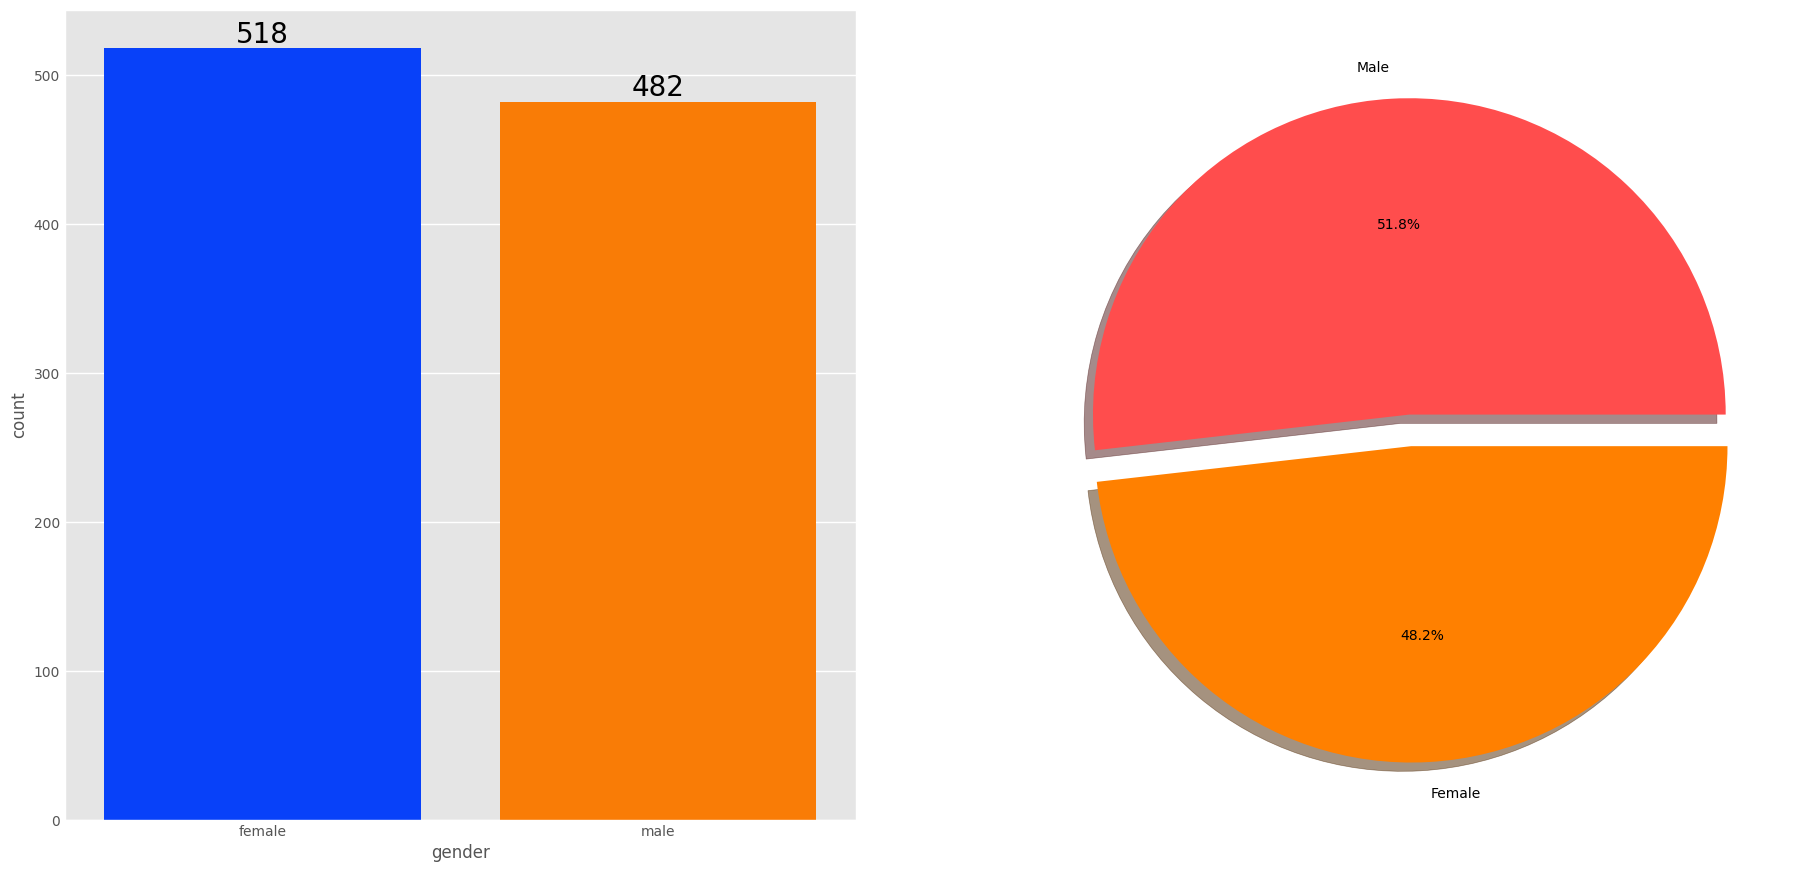

In [1279]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [1280]:
gender_group = df.groupby('gender').mean(numeric_only=True).round(2)
print(gender_group)

        math_score  reading_score  writing_score  total score  average
gender                                                                
female       63.63          72.61          72.47       208.71    69.57
male         68.73          65.47          63.31       197.51    65.84


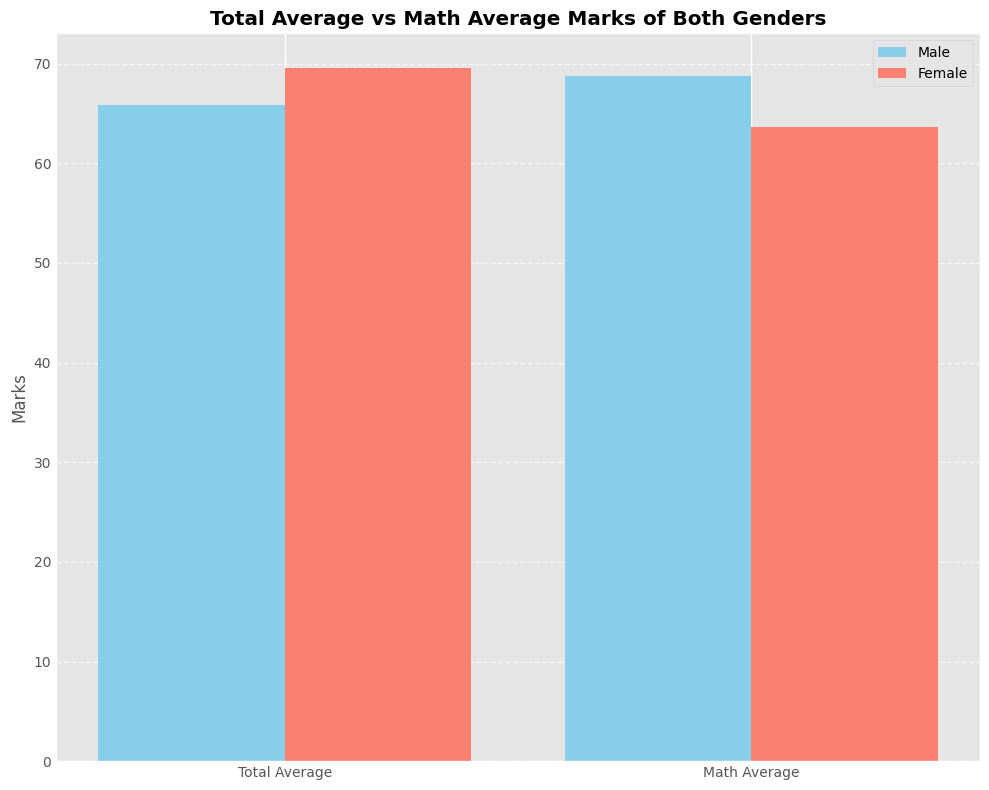

In [1281]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Make sure to access the right index: use .loc for clarity
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores   = [gender_group.loc['male', 'average'],   gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='salmon')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

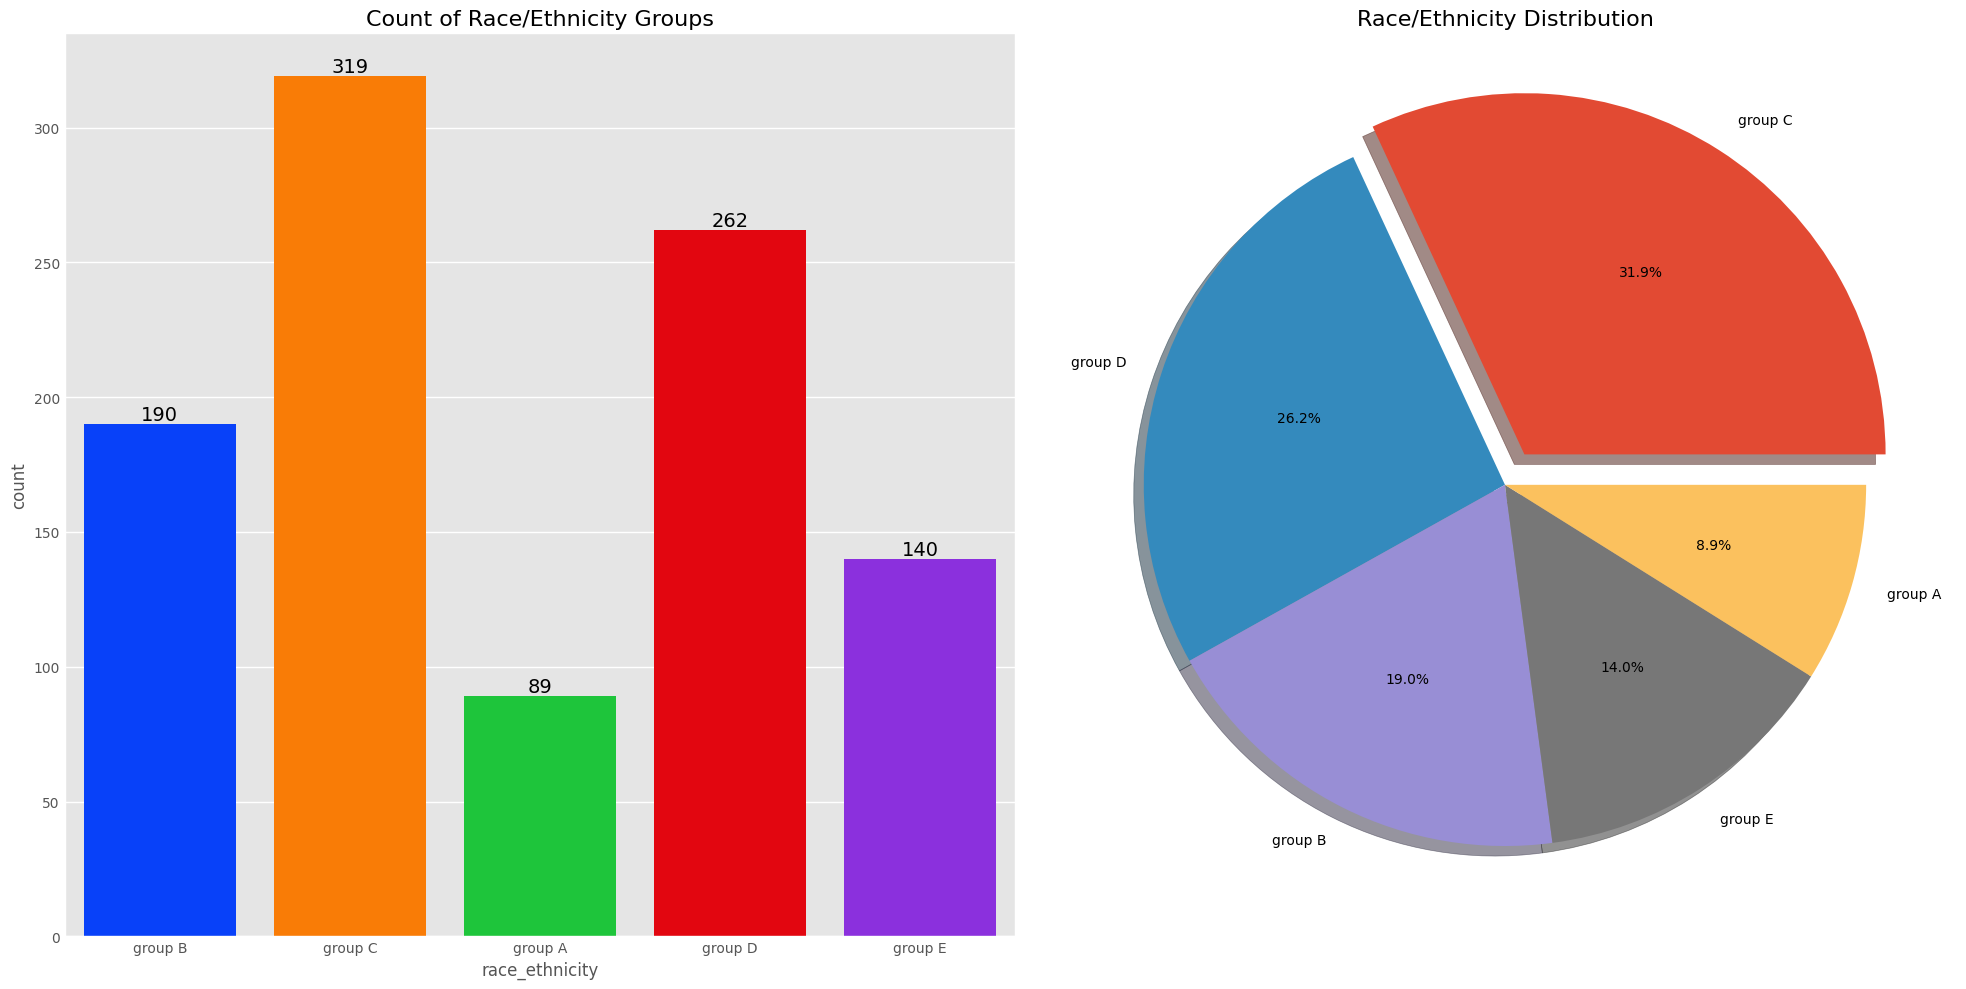

In [1282]:
# Use the correct column name
col = 'race_ethnicity'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.countplot(x=col, data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Count of Race/Ethnicity Groups', fontsize=16)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Pie chart
ax[1].pie(
    x=df[col].value_counts(),
    labels=df[col].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],  # explode the first slice
    autopct='%1.1f%%',
    shadow=True
)
ax[1].set_title('Race/Ethnicity Distribution', fontsize=16)

plt.tight_layout()
plt.show()

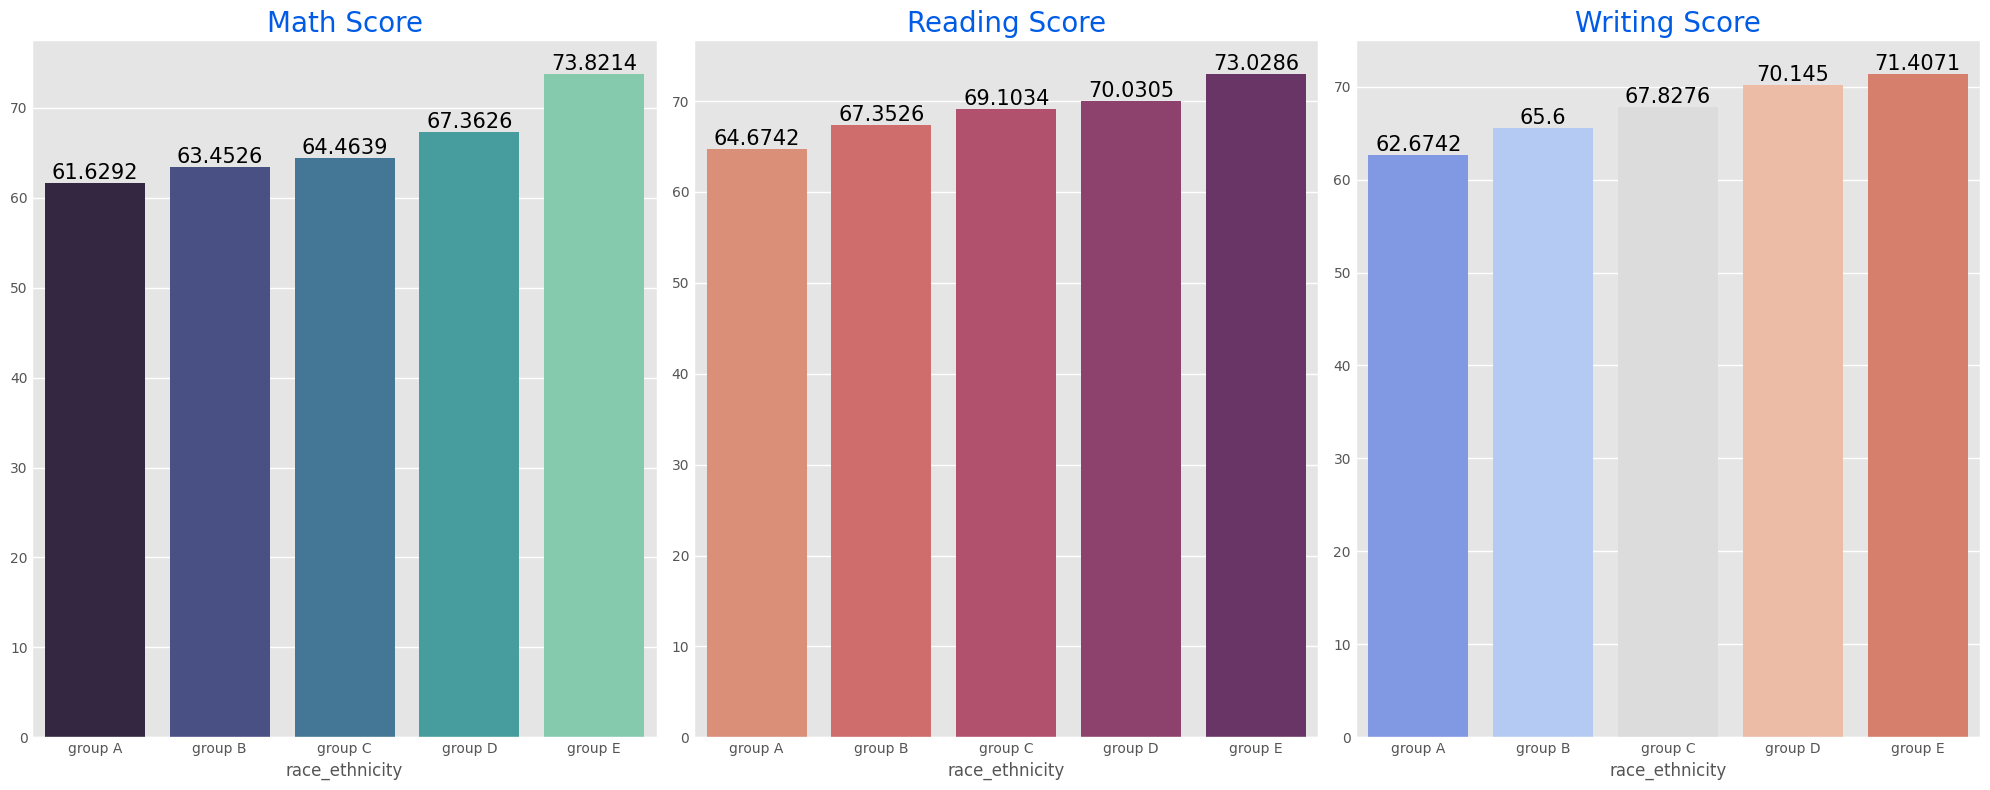

In [1283]:
Group_data2 = df.groupby('race_ethnicity')

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score barplot
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading score barplot
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing score barplot
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

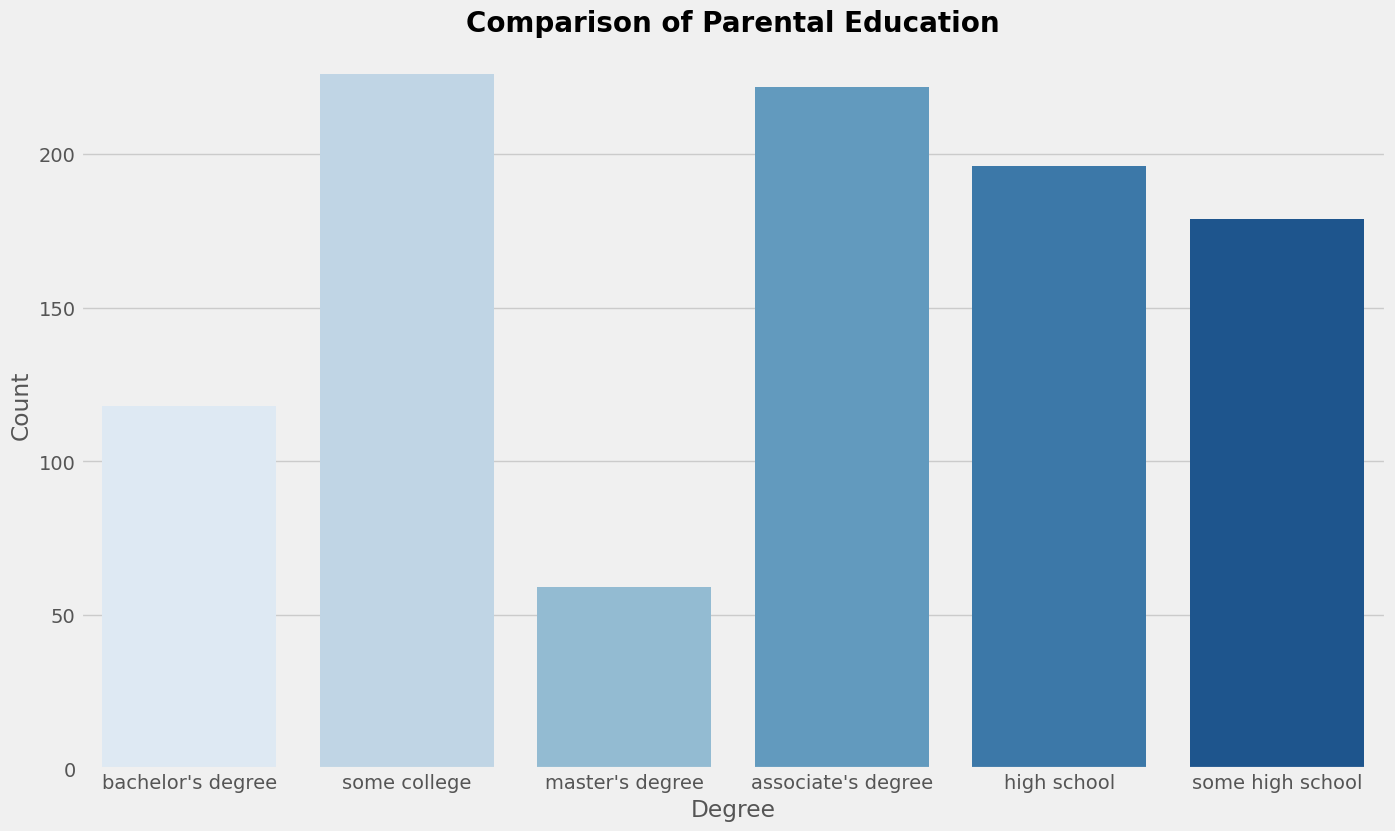

In [1284]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Countplot for parental level of education
sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

# Title and labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Display the plot
plt.show()

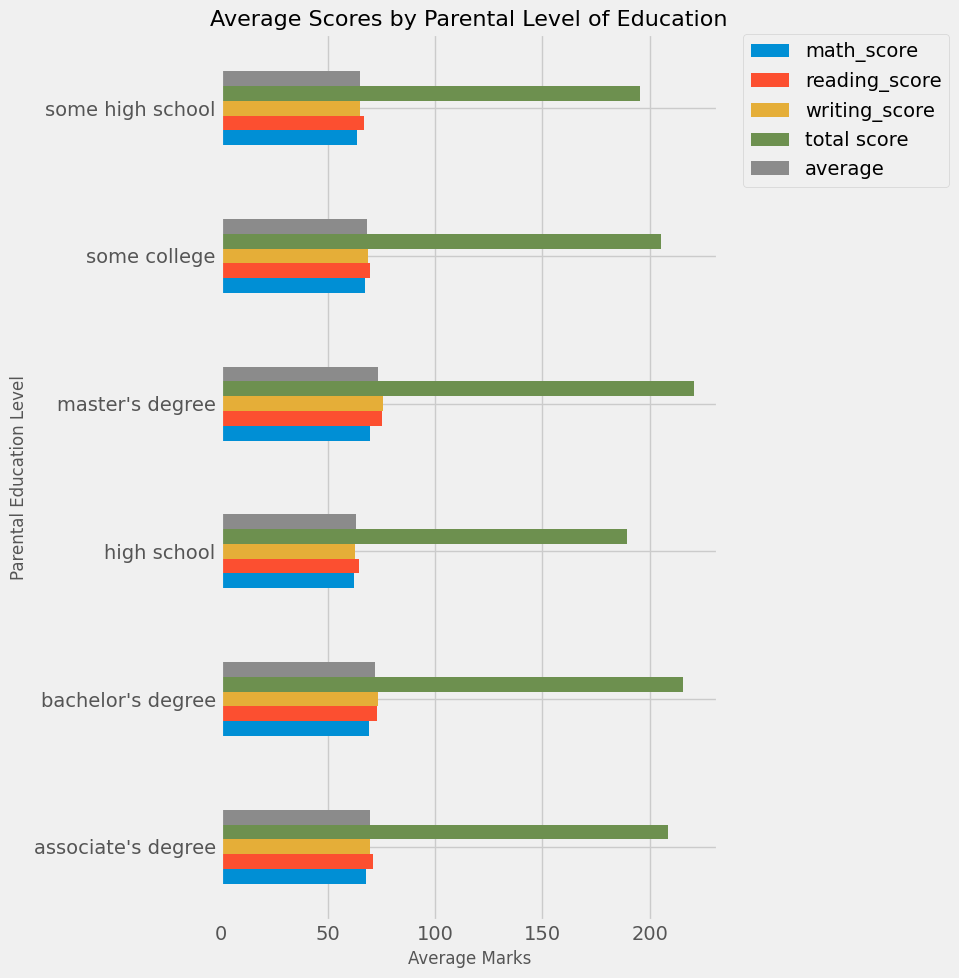

In [1285]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'parental level of education' and calculate the mean for numeric columns only
df.groupby('parental_level_of_education')[numeric_columns].agg('mean').plot(kind='barh', figsize=(10, 10))

# Set title and labels
plt.title('Average Scores by Parental Level of Education', fontsize=16)
plt.xlabel('Average Marks', fontsize=12)
plt.ylabel('Parental Education Level', fontsize=12)

# Adjust the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.tight_layout()
plt.show()

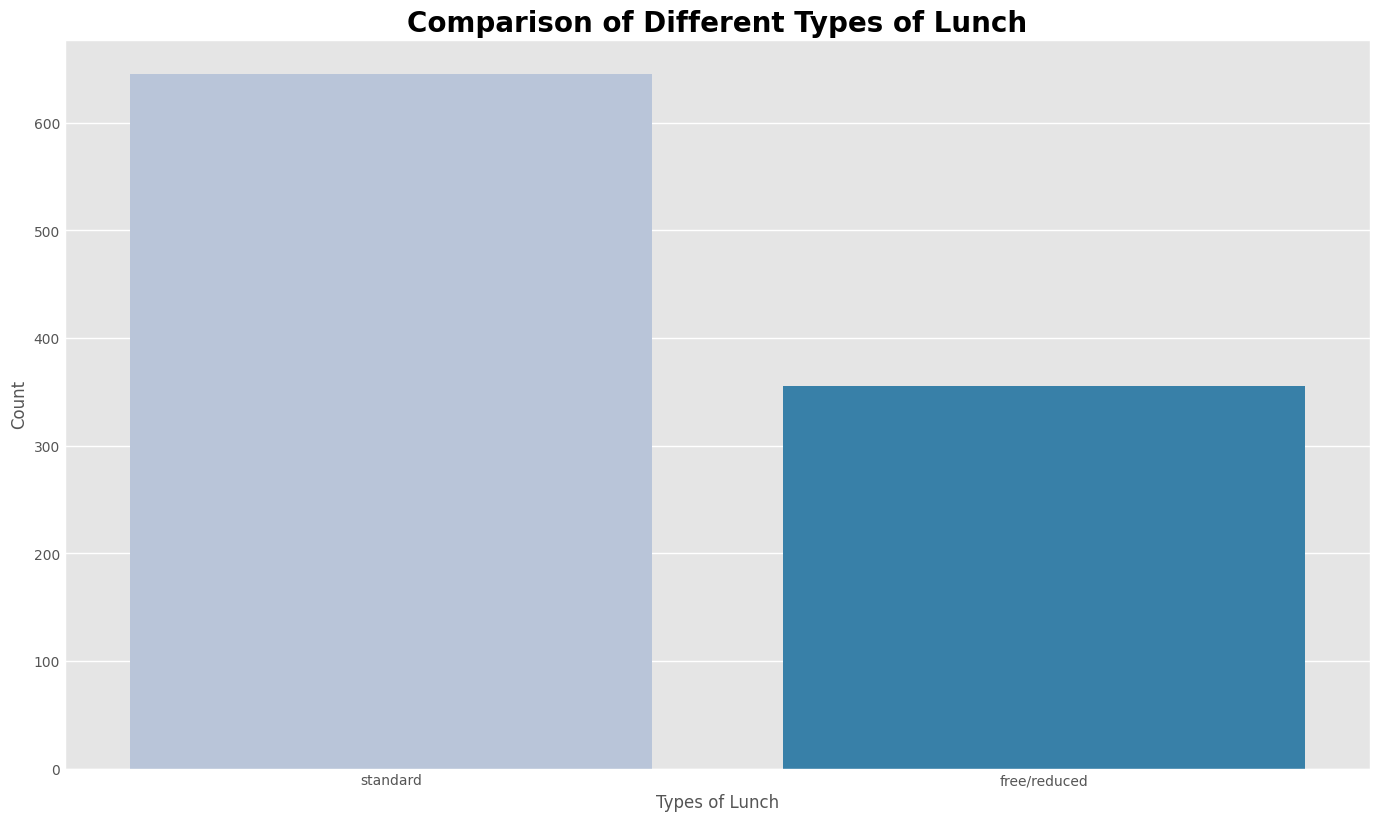

In [1286]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')  # Use an available style

# Countplot for the 'lunch' column
sns.countplot(x='lunch', data=df, palette='PuBu')

# Title and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Display the plot
plt.show()

In [1287]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


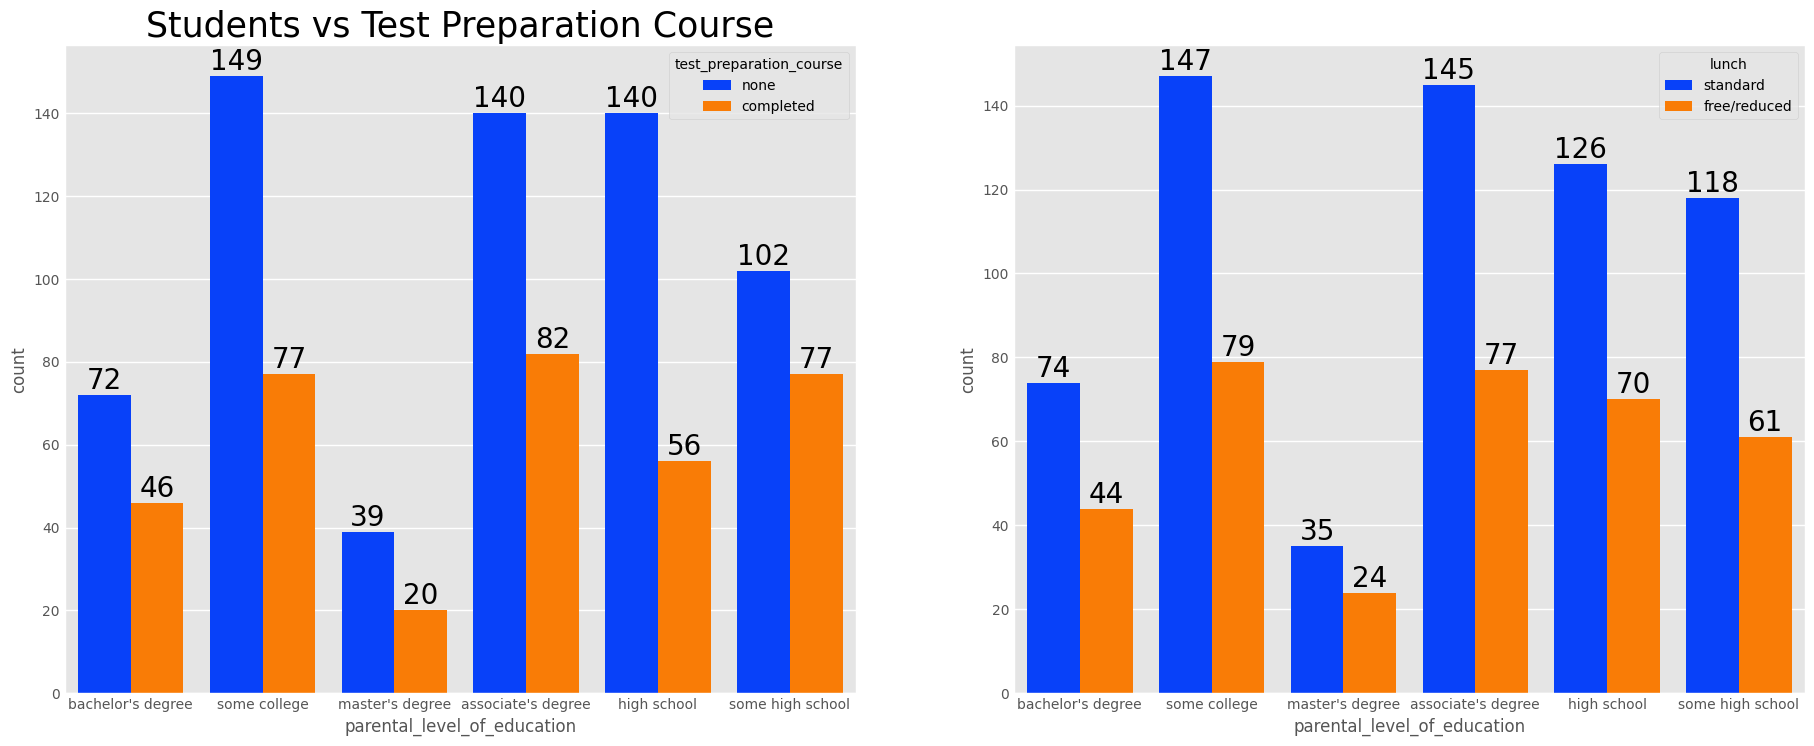

In [1288]:
df.columns = df.columns.str.strip()

# Then retry the countplot
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First plot: Students vs Test Preparation Course (hue based on test preparation course)
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', fontsize=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=20)

# Second plot: Students vs Lunch (hue based on lunch)
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=20)

plt.show()

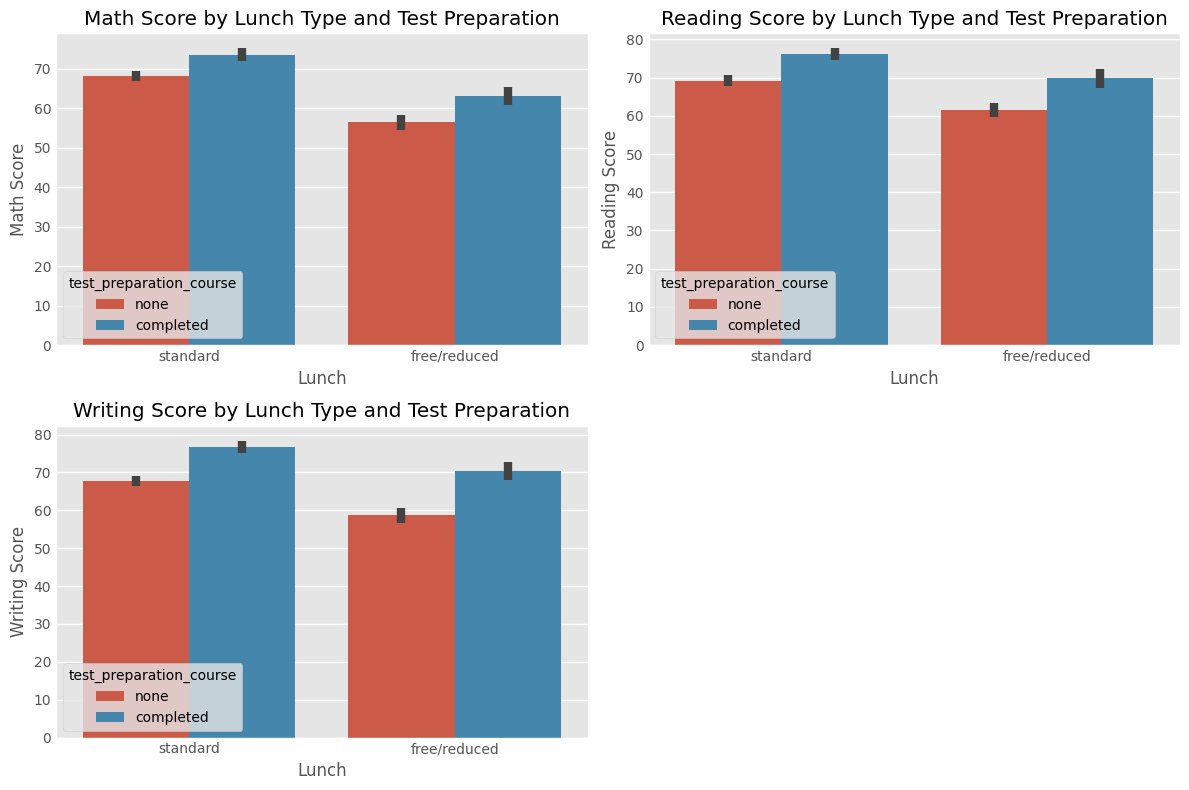

In [1289]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot 1: Math score
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Math Score')

# Plot 2: Reading score
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title('Reading Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Reading Score')

# Plot 3: Writing score
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title('Writing Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()



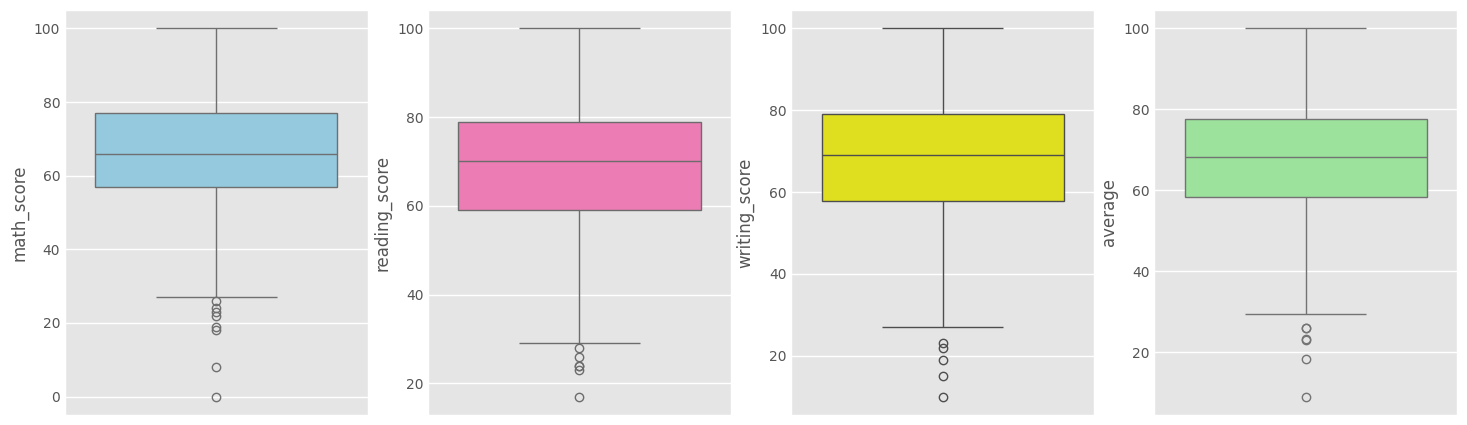

In [1290]:
plt.subplots(1, 4, figsize=(16, 5))

# First boxplot: math score
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')

# Second boxplot: reading score
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')

# Third boxplot: writing score
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')

# Fourth boxplot: average score
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

plt.show()

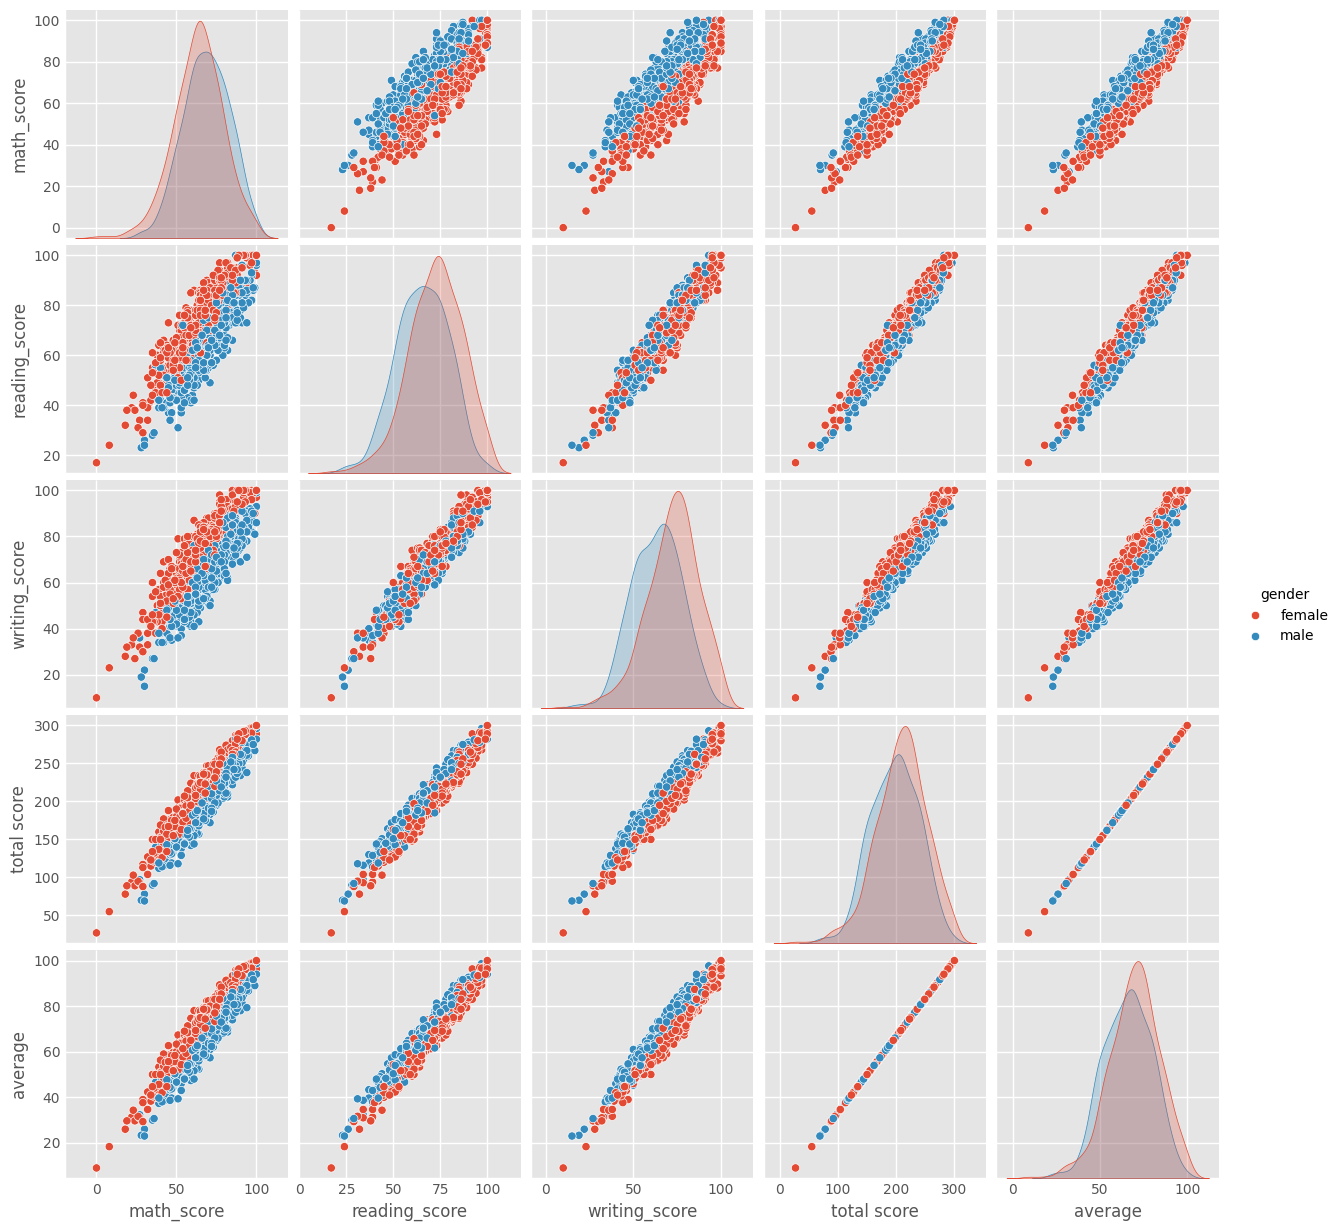

In [1291]:
sns.pairplot(df,hue = 'gender')
plt.show()


### 5. Conclusions

Student's Performance is related with lunch, race, parental level education

Student's Performance is related with lunch, race, parental level education

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.